# Regressão Linear: Reobtendo a Lei de Moore Usando o Tensorflow

In [38]:
# Importando o tensorflow
import tensorflow as tf


In [39]:
# Importando as demais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

In [18]:
# Obtendo a base de dados
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-04-15 21:34:03--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 2302 (2,2K) [text/plain]
Salvando em: “moore.csv.1”

moore.csv.1         100%[===================>]   2,25K  --.-KB/s    em 0s      

2022-04-15 21:34:03 (20,9 MB/s) - “moore.csv.1” salvo [2302/2302]



In [40]:
# Carregando a base de dados e trabalhando com ela
data = pd.read_csv("moore.csv", header=None).values
x = data[:, 0].reshape(-1,1)
y = data[:, 1]

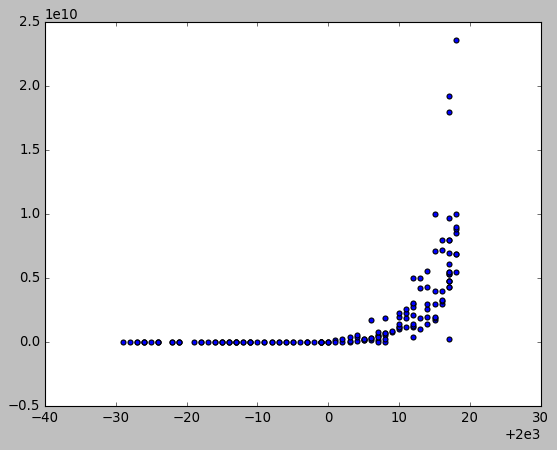

In [41]:
plt.scatter(x,y)
plt.show()

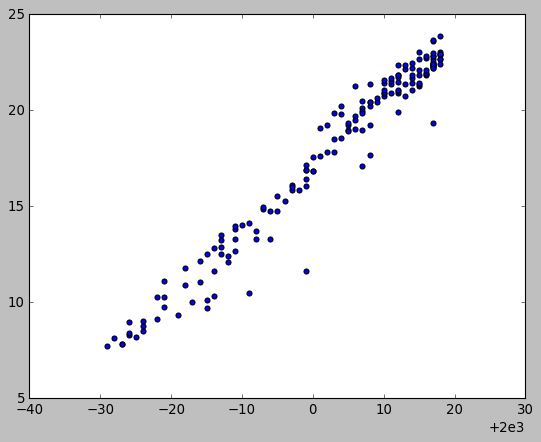

In [42]:
# Sabendo que queremos um modelo linear, vamos tomar o logaritmo
y = np.log(y)
plt.scatter(x, y)
plt.show()

Vamos realizar um breve pré-processamento dos dados antes de construirmos o modelo, primeiramente vamos centralizar os dados em x.

In [43]:
x = x - x.mean()

In [44]:
# Agora podemos criar o nosso modelo no tensorflow

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')


# Criando uma agenda para o treinamento
def schedule(epoch, lr):
    if epoch >=50:
        return 0.0001
    return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Treinando o modelo
r = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 340.3529 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 449.2179 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 325.2914 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 232.0068 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 283.9579 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 337.1189 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 169.9273 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 130.0150 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 81.6244 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 52.8210 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss:

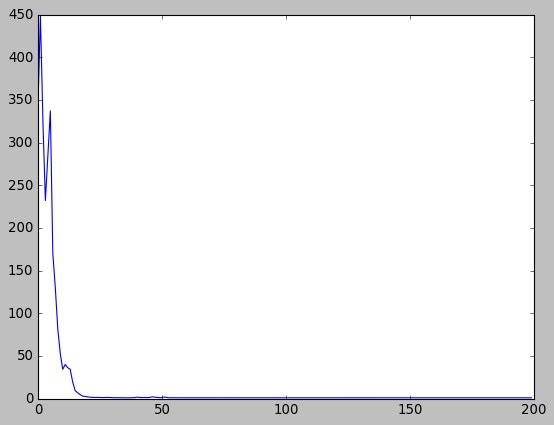

In [45]:
# plotando a função loss
plt.plot(r.history['loss'], label='loss')
plt.show()

In [46]:
# Obtendo a inclinação da reta
# A inclinação da reta é a taxa de crescimento do número de transistors

print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34012088]], dtype=float32), array([17.76832], dtype=float32)]


In [47]:
# A inclinação da reta é:
a = model.layers[0].get_weights()[0][0,0]

0.34012088

Portanto, o tempo para dobrar o número de transistores pode ser dado por:

In [49]:
x = np.array(x).flatten()
y = np.array(y)
denominador = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum())/denominador
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y))/denominador
print(a, b)
print('Tempo para dobrar o número de transistores: ', np.log(2)/a)

0.34168248738731316 17.764939393631764
Tempo para dobrar o número de transistores:  2.0286295205239195
